In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv
/kaggle/input/titanic-machine-learning-from-disaster/gender_submission.csv


# Import Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the Data

In [3]:
train = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/train.csv')
test = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

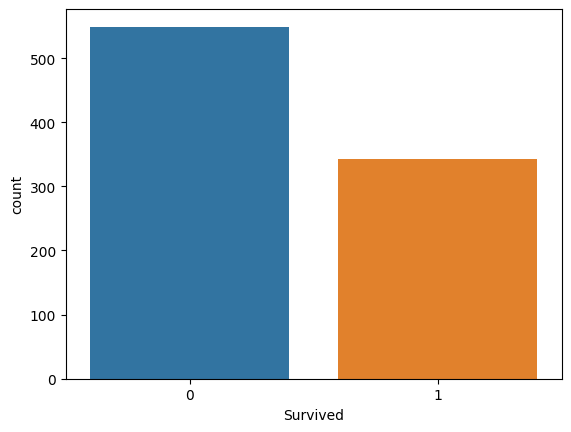

In [6]:
sns.countplot(x = "Survived" , data = train)

<Axes: xlabel='Pclass', ylabel='count'>

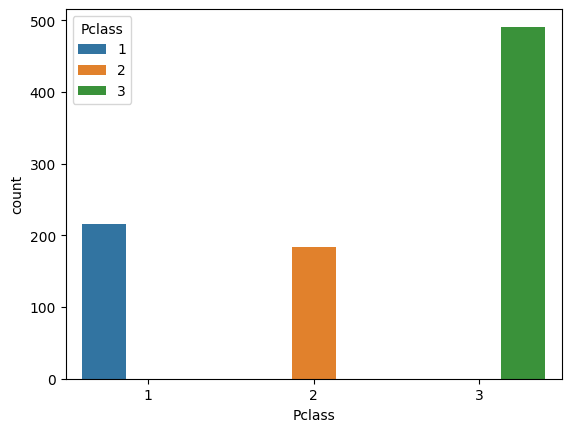

In [7]:
sns.countplot(x = "Pclass", hue = "Pclass", data = train)

<Axes: xlabel='Sex', ylabel='count'>

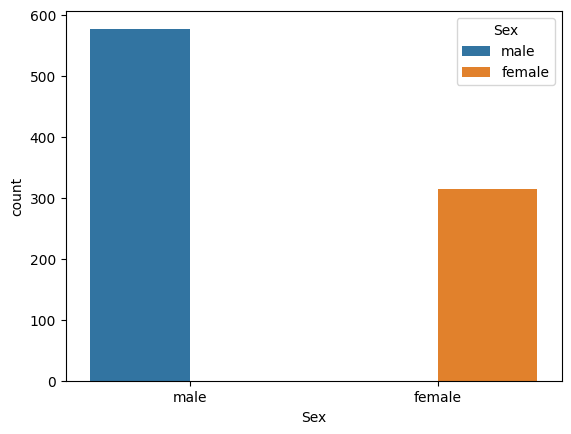

In [8]:
sns.countplot(x = "Sex", hue = "Sex", data = train)

<Axes: xlabel='SibSp', ylabel='count'>

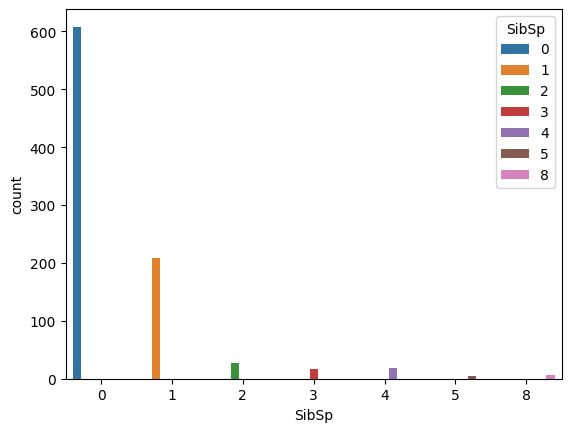

In [9]:
sns.countplot(x = "SibSp", hue = "SibSp", data = train)

<Axes: xlabel='Parch', ylabel='count'>

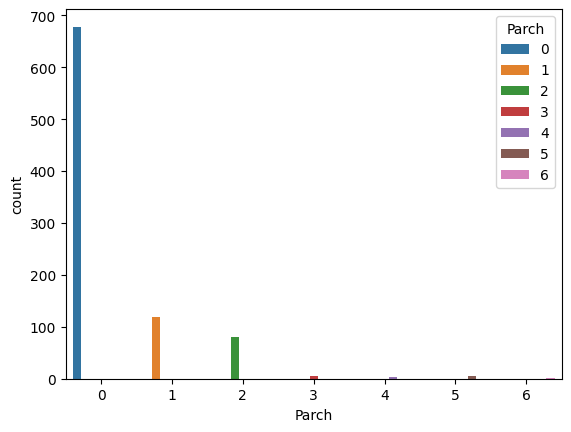

In [10]:
sns.countplot(x = "Parch", hue = "Parch", data = train)

<Axes: xlabel='Embarked', ylabel='count'>

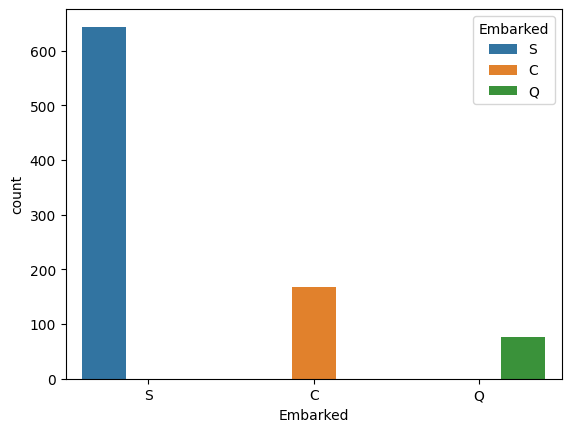

In [11]:
sns.countplot(x = "Embarked", hue = "Embarked", data = train)

<Axes: xlabel='Age', ylabel='Density'>

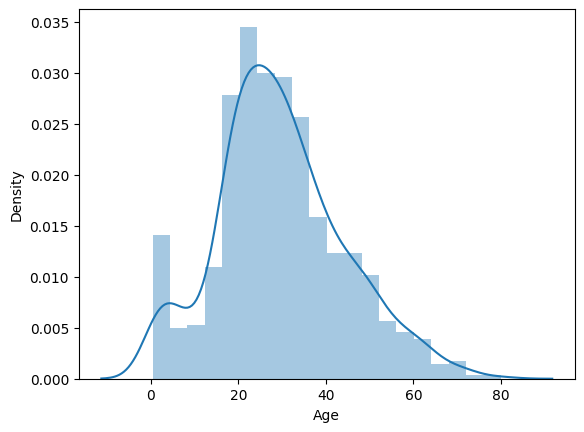

In [12]:
#numerical attributes
sns.distplot(train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

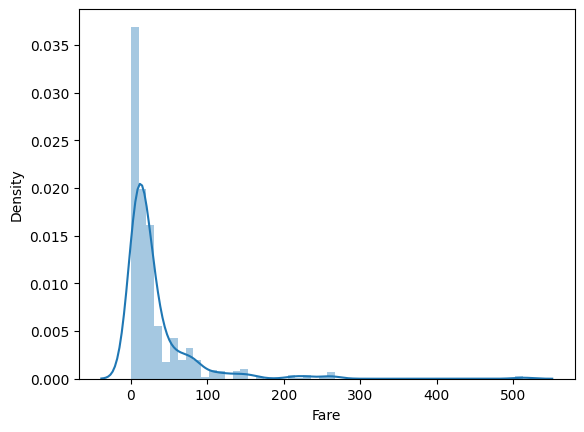

In [13]:
sns.distplot(train['Fare'])

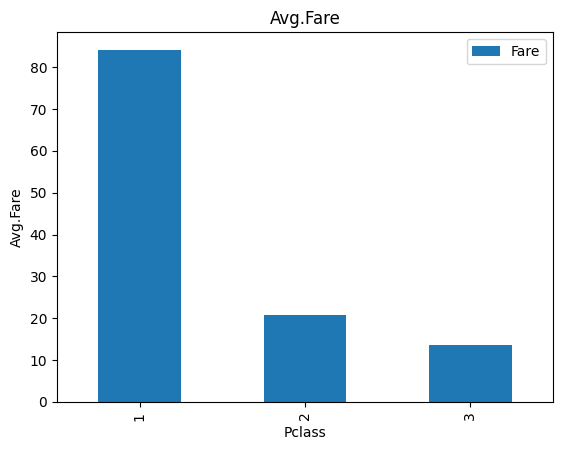

In [14]:
class_fare = train.pivot_table(index = 'Pclass',values = 'Fare') 
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg.Fare')
plt.title('Avg.Fare')
plt.show()

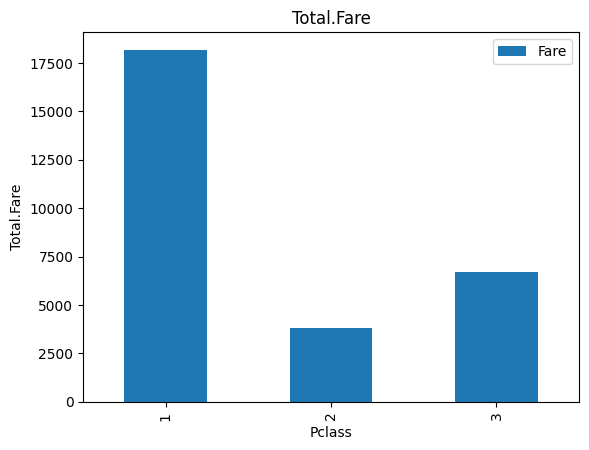

In [15]:
class_fare = train.pivot_table(index = 'Pclass',values = 'Fare', aggfunc=np.sum) 
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total.Fare')
plt.title('Total.Fare')
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

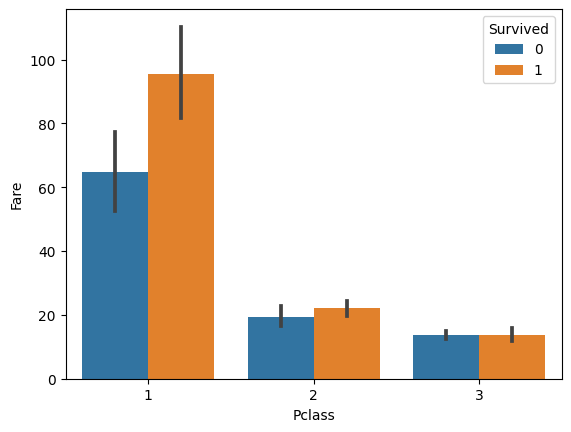

In [16]:
sns.barplot(x = "Pclass",y='Fare', hue = "Survived", data = train)

<Axes: xlabel='Survived', ylabel='Fare'>

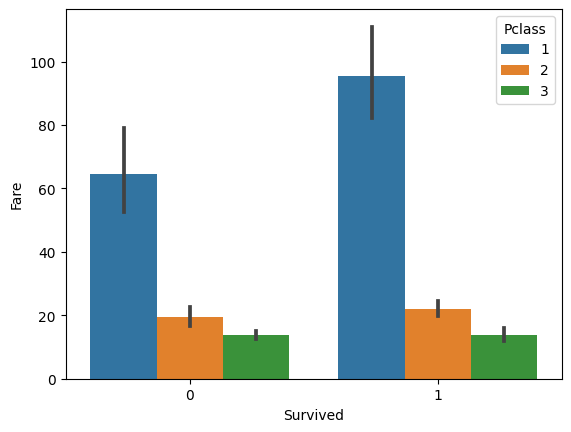

In [17]:
sns.barplot(x = "Survived",y='Fare', hue = "Pclass", data = train)

# Data Preprocessing

In [18]:
train_len = len(train)
#combine two dataframes
df = pd.concat([train,test],axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train_len

891

In [20]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [21]:
#finding the null values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [22]:
#fill the missing values
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [23]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [24]:
train["Age"] = train["Age"].fillna(train["Age"].mean())
test["Age"] = test["Age"].fillna(test["Age"].mean())
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())
train["Cabin"] = train["Cabin"].fillna(train["Cabin"].mode()[0])
test["Cabin"] = test["Cabin"].fillna(test["Cabin"].mode()[0])
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

In [25]:
train["Sex"] = [1 if i == "male" else 0 for i in train["Sex"]]
test["Sex"] = [1 if i == "male" else 0 for i in test["Sex"]]
train["Embarked"] = [0 if i =="S" else i for i in train["Embarked"]]
train["Embarked"] = [0 if i =="C" else i for i in train["Embarked"]]
train["Embarked"] = [0 if i =="Q" else i for i in train["Embarked"]]
test["Embarked"] = [0 if i =="S" else i for i in test["Embarked"]]
test["Embarked"] = [0 if i =="C" else i for i in test["Embarked"]]
test["Embarked"] = [0 if i =="Q" else i for i in test["Embarked"]]

# Log transformation for uniform data distribution

<Axes: xlabel='Fare', ylabel='Density'>

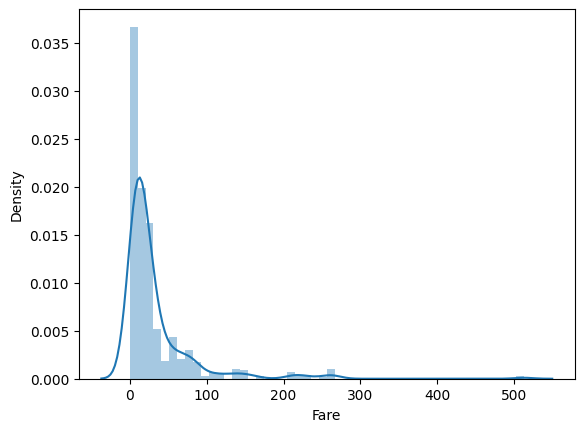

In [26]:
sns.distplot(df['Fare'])

In [27]:
df['Fare'] = np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

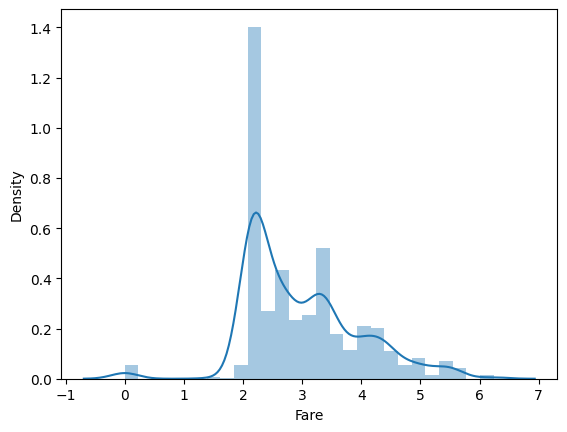

In [28]:
sns.distplot(df['Fare'])

# Calculate the correlation coefficient

In [29]:
cols = ["Survived","Pclass", "Sex","Age","SibSp","Parch","Fare","Embarked"]

In [30]:
train_corr = train[cols].corr()

In [31]:
train_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,NaN
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,NaN
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,NaN
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,NaN
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,NaN
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,NaN
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,NaN
Embarked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Draw heatmap by using seaborn

<Axes: >

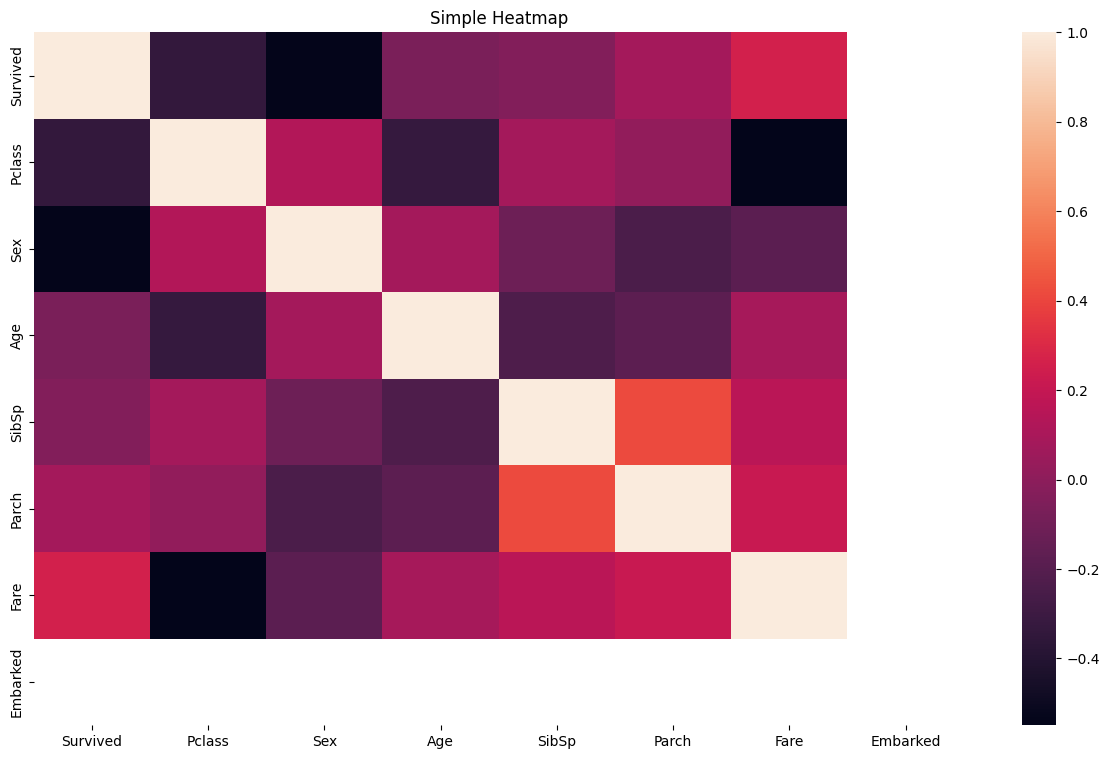

In [ ]:
fig,ax = plt.subplots(figsize=(15,9))
sns.heatmap(train_corr)
ax.set_title('Simple Heatmap')

fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,10))
sns.heatmap(train_corr,annot=True,ax=ax1)
sns.heatmap(train_corr,annot=False,ax=ax2)

In [ ]:
df.head()

In [ ]:
# drop unnecessary columns
df = df.drop(columns=['Name','Ticket'],axis=1)
df.head()

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

# Train-Test Split

In [ ]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
x = train.drop(columns=['PassengerId','Survived','Cabin'], axis=1)
y = train['Survived']

In [ ]:
x.head()

# Model Training

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
train.head()

In [ ]:
train.dropna(inplace=True)

In [ ]:
x = train.drop(columns=['PassengerId','Survived','Cabin'], axis=1)
y = train['Survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, random_state=42)

In [ ]:
rgr = LinearRegression()
rgr.fit(x_train,y_train)

In [ ]:
rgr.score(x_test,y_test)

In [ ]:
rgr.score(x_train,y_train)

In [ ]:
test.head()

In [ ]:
test.dropna(inplace=True)

In [ ]:
# input split for test data
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)

In [ ]:
X_test.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, random_state=42)

In [ ]:
rgr = LinearRegression()
rgr.fit(x_test,y_test)

In [ ]:
pred = rgr.predict(x_test)
pred

# Test Submission

In [ ]:
sub = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/gender_submission.csv')
sub.head()

In [ ]:
sub.info()

In [ ]:
sub.to_csv('submission.csv',index=False)